In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\Ofri\OneDrive - Birkerød Gymnasium - STX, HF, IB & Kostskole\ITU\DATA SCIENCE\1ST year\Projects in Data Science\Lecture1\metadata_with_group (2).csv")
df.columns


Index(['Unnamed: 0', 'patient_id', 'lesion_id', 'smoke', 'drink',
       'background_father', 'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed', 'group_id'],
      dtype='object')

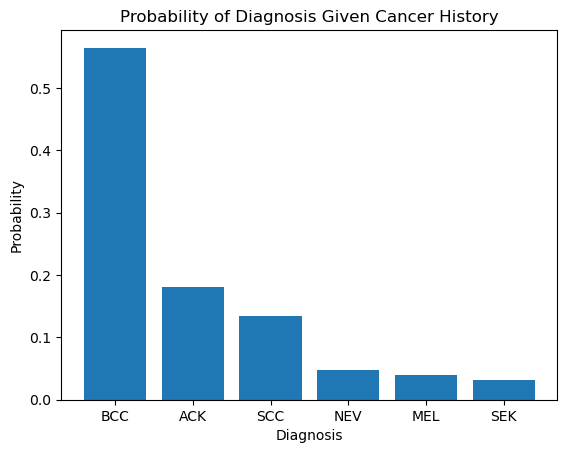

In [ ]:


# Filter patients with cancer history
df_ch = df[df["cancer_history"] == True]

# Count diagnoses within this group
diagnosis_counts = df_ch["diagnostic"].value_counts()

# Convert counts to probabilities (odds as proportions)
diagnosis_probs = diagnosis_counts / diagnosis_counts.sum()

# Plot distribution
plt.figure()
plt.bar(diagnosis_probs.index, diagnosis_probs.values)
plt.title("Probability of Diagnosis Given Cancer History")
plt.xlabel("Diagnosis")
plt.ylabel("Probability")
plt.show()


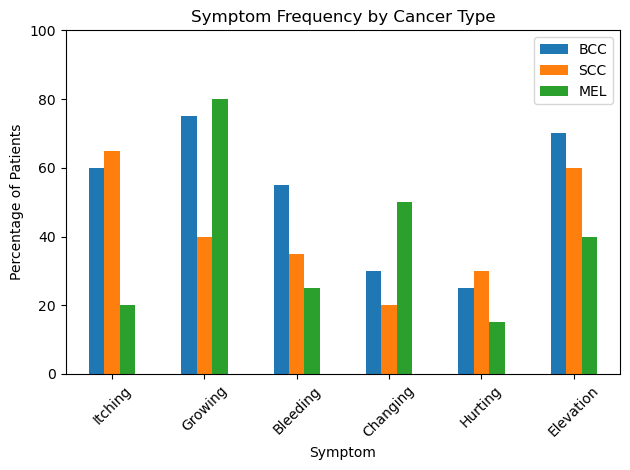

In [ ]:
data = {
    'Symptom': ['Itching', 'Growing', 'Bleeding', 'Changing', 'Hurting', 'Elevation'],
    'BCC': [60, 75, 55, 30, 25, 70],
    'SCC': [65, 40, 35, 20, 30, 60],
    'MEL': [20, 80, 25, 50, 15, 40]
}

df = pd.DataFrame(data)
df.set_index('Symptom').plot(kind='bar')

plt.ylabel('Percentage of Patients')
plt.title('Symptom Frequency by Cancer Type')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

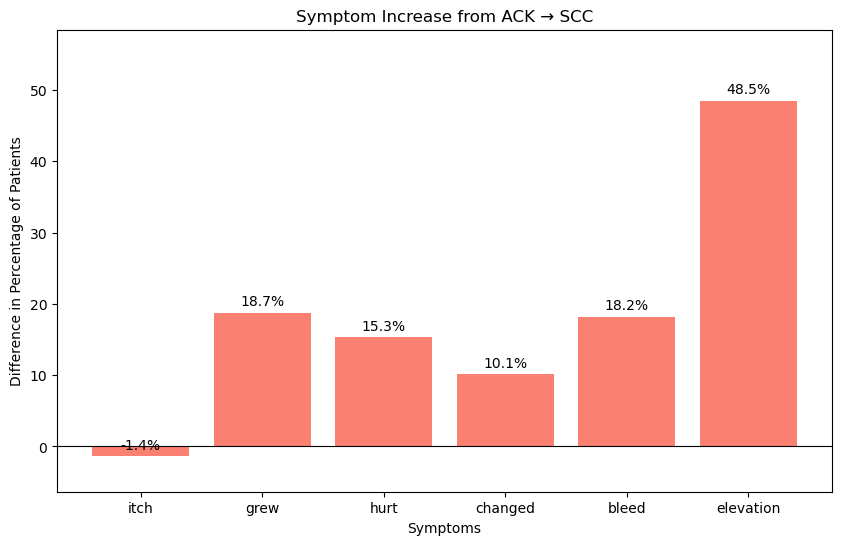

In [ ]:

# List of symptom columns
symptom_cols = ["itch", "grew", "hurt", "changed", "bleed", "elevation"]

# Filter ACK and SCC
df_ack = df[df["diagnostic"] == "ACK"]
df_scc = df[df["diagnostic"] == "SCC"]

# Calculate percentage of patients with each symptom
ack_symptoms = df_ack[symptom_cols].mean() * 100
scc_symptoms = df_scc[symptom_cols].mean() * 100

# Difference SCC - ACK
symptom_diff = scc_symptoms - ack_symptoms

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(symptom_diff.index, symptom_diff.values, color="salmon")
plt.axhline(0, color='black', linewidth=0.8)  # baseline

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center')

plt.title("Symptom Increase from ACK → SCC")
plt.ylabel("Difference in Percentage of Patients")
plt.xlabel("Symptoms")
plt.ylim(min(symptom_diff.values)-5, max(symptom_diff.values)+10)
plt.show()

In [6]:
df.columns

Index(['Unnamed: 0', 'patient_id', 'lesion_id', 'smoke', 'drink',
       'background_father', 'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed', 'group_id', 'group'],
      dtype='object')

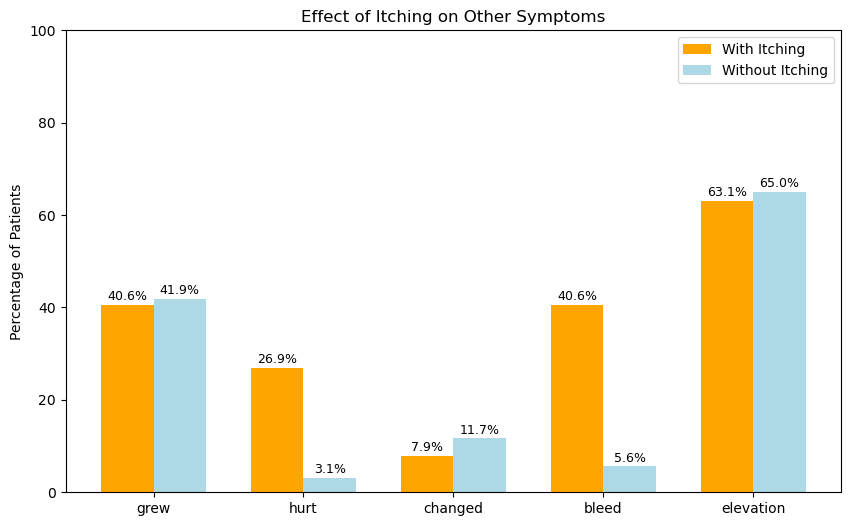

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load CSV ---
df = pd.read_csv(
    r"C:\Users\Ofri\OneDrive - Birkerød Gymnasium - STX, HF, IB & Kostskole\ITU\DATA SCIENCE\1ST year\Projects in Data Science\Lecture1\metadata_with_group (2).csv",
    sep=",",  # make sure your CSV uses commas; change to ";" if needed
    encoding="utf-8"
)


# --- 2. Clean symptom columns ---
symptom_cols = ["itch", "grew", "hurt", "changed", "bleed", "elevation"]

# Convert to numeric 0/1
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip().map({"False": 0, "True": 1, "UNK": 0})

# --- 3. Separate patients by itching ---
itch_yes = df[df["itch"] == 1]
itch_no = df[df["itch"] == 0]

# Calculate average percentages for other symptoms (excluding itch itself)
other_symptoms = ["grew", "hurt", "changed", "bleed", "elevation"]
avg_with_itch = itch_yes[other_symptoms].mean() * 100
avg_without_itch = itch_no[other_symptoms].mean() * 100

# --- 4. Plot side-by-side bar chart ---
x = range(len(other_symptoms))
width = 0.35

plt.figure(figsize=(10,6))
bars1 = plt.bar([i - width/2 for i in x], avg_with_itch.values, width=width, color="orange", label="With Itching")
bars2 = plt.bar([i + width/2 for i in x], avg_without_itch.values, width=width, color="lightblue", label="Without Itching")

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', fontsize=9)

plt.xticks(x, other_symptoms)
plt.ylabel("Percentage of Patients")
plt.title("Effect of Itching on Other Symptoms")
plt.ylim(0, 100)
plt.legend()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- 1) Load your data ----
# Option A: CSV
df = pd.read_csv(
    r"C:\Users\Ofri\OneDrive - Birkerød Gymnasium - STX, HF, IB & Kostskole\ITU\DATA SCIENCE\1ST year\Projects in Data Science\Lecture1\metadata_with_group (2).csv",
    sep=",",  # make sure your CSV uses commas; change to ";" if needed
    encoding="utf-8"
)
benign = {"ACK", "NEV", "SEK"}
malignant = {"BCC", "SCC", "MEL"}

df["malignancy_group"] = np.where(
    df["diagnostic"].isin(malignant), "Malignant",
    np.where(df["diagnostic"].isin(benign), "Benign", "Other")
)

# Keep only benign and malignant
df2 = df[df["malignancy_group"].isin(["Benign", "Malignant"])]
summary = (
    df2.groupby("malignancy_group")["lesion_area"]
       .agg(n="count",
            median="median",
            mean="mean",
            q1=lambda s: s.quantile(0.25),
            q3=lambda s: s.quantile(0.75))
       .reset_index()
)

summary["IQR"] = summary["q3"] - summary["q1"]
print(summary)



KeyError: 'Column not found: lesion_area'

C:\Users\Ofri\AppData\Local\Temp\ipykernel_33788\2230813464.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([benign_vals, malig_vals], labels=["Benign - Not Cancer", "Malignant - Cancer"], showfliers=True)


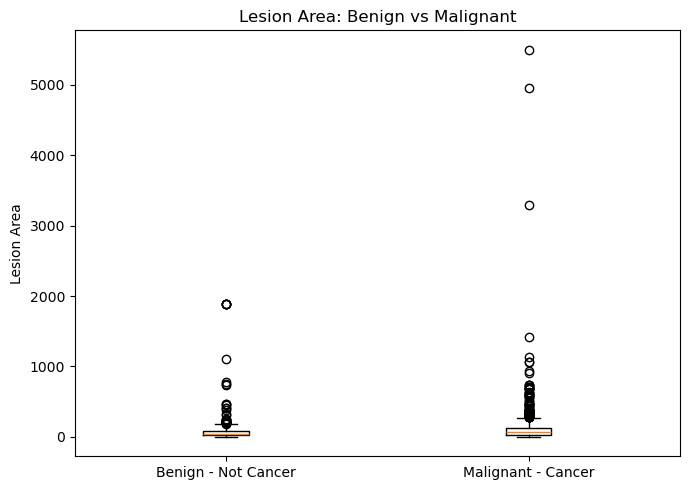

In [13]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:\Users\Ofri\OneDrive - Birkerød Gymnasium - STX, HF, IB & Kostskole\ITU\DATA SCIENCE\1ST year\Projects in Data Science\Lecture1\metadata_with_group (2).csv",
    sep=",",  # make sure your CSV uses commas; change to ";" if needed
    encoding="utf-8"
)

# make sure diameter columns are numbers
df["diameter_1"] = pd.to_numeric(df["diameter_1"], errors="coerce")
df["diameter_2"] = pd.to_numeric(df["diameter_2"], errors="coerce")
# ellipse area
df["lesion_area"] = np.pi * (df["diameter_1"]/2) * (df["diameter_2"]/2)

# keep rows where we actually have area + diagnosis
d = df.dropna(subset=["lesion_area", "diagnostic"]).copy()
benign = ["ACK", "NEV", "SEK"]
malignant = ["BCC", "SCC", "MEL"]

def group_diag(x):
    if x in malignant: return "Malignant"
    if x in benign: return "Benign"
    return None

d["malignancy_group"] = d["diagnostic"].apply(group_diag)
d = d.dropna(subset=["malignancy_group"])

benign_vals = d.loc[d["malignancy_group"]=="Benign", "lesion_area"].values
malig_vals  = d.loc[d["malignancy_group"]=="Malignant", "lesion_area"].values

plt.figure(figsize=(7,5))
plt.boxplot([benign_vals, malig_vals], labels=["Benign - Not Cancer", "Malignant - Cancer"], showfliers=True)
plt.ylabel("Lesion Area")
plt.title("Lesion Area: Benign vs Malignant")
plt.tight_layout()
plt.show()